In [15]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc


sc = SparkContext("local[2]", "TwitterDemo")
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)
ssc.checkpoint( "file:///Users/Pepe/Desktop/Github/FinalBDNR/Files/checkpoint")

socket_stream = ssc.socketTextStream("localhost", 4040)

lines = socket_stream.window(10)

from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )


import nltk
nltk.download('stopwords')
nltk.download('punkt')
from stop_words import get_stop_words
from nltk.corpus import stopwords

stop_words = list(get_stop_words('es'))         #Have around 900 stopwords
nltk_words = list(stopwords.words('spanish'))   #Have around 150 stopwords
stop_words.extend(nltk_words)

#llamada a función stop words
clean(lines)


(lines
  .flatMap( lambda text: text.split( " " ) )
  .filter( lambda word: word.lower().startswith("#") )
  .map( lambda word: ( word.lower(), 1 ) )
  .reduceByKey( lambda a, b: a + b )
  .map( lambda rec: Tweet( rec[0], rec[1] ) )
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") )
  .limit(10).registerTempTable("tweets") ) )

ssc.start()

import matplotlib.pyplot as plt

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=TwitterDemo, master=local[2]) created by __init__ at <ipython-input-1-9e050480d6b6>:7 

In [16]:
ssc.stop()

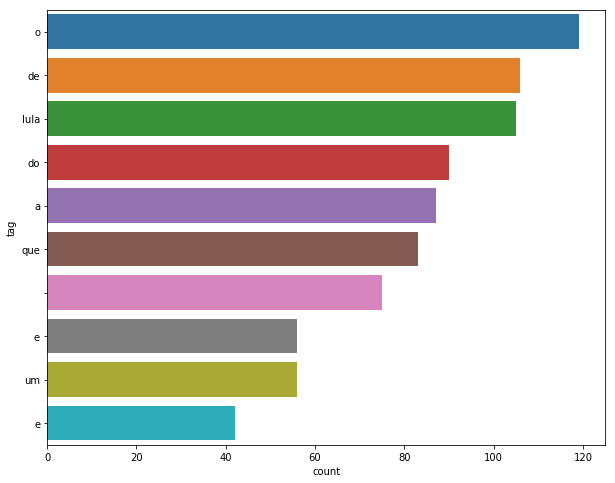

Py4JJavaError: An error occurred while calling o27.awaitTermination.
: org.apache.spark.SparkException: An exception was raised by Python:
Traceback (most recent call last):
  File "C:\Users\Pepe\Anaconda3\lib\site-packages\pyspark\streaming\util.py", line 65, in call
    r = self.func(t, *rdds)
  File "C:\Users\Pepe\Anaconda3\lib\site-packages\pyspark\streaming\dstream.py", line 159, in <lambda>
    func = lambda t, rdd: old_func(rdd)
  File "<ipython-input-1-9e050480d6b6>", line 26, in <lambda>
    .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") )
  File "C:\Users\Pepe\Anaconda3\lib\site-packages\pyspark\sql\session.py", line 58, in toDF
    return sparkSession.createDataFrame(self, schema, sampleRatio)
  File "C:\Users\Pepe\Anaconda3\lib\site-packages\pyspark\sql\session.py", line 689, in createDataFrame
    rdd, schema = self._createFromRDD(data.map(prepare), schema, samplingRatio)
  File "C:\Users\Pepe\Anaconda3\lib\site-packages\pyspark\sql\session.py", line 384, in _createFromRDD
    struct = self._inferSchema(rdd, samplingRatio, names=schema)
  File "C:\Users\Pepe\Anaconda3\lib\site-packages\pyspark\sql\session.py", line 355, in _inferSchema
    first = rdd.first()
  File "C:\Users\Pepe\Anaconda3\lib\site-packages\pyspark\rdd.py", line 1379, in first
    raise ValueError("RDD is empty")
ValueError: RDD is empty

	at org.apache.spark.streaming.api.python.TransformFunction.callPythonTransformFunction(PythonDStream.scala:95)
	at org.apache.spark.streaming.api.python.TransformFunction.apply(PythonDStream.scala:78)
	at org.apache.spark.streaming.api.python.PythonDStream$$anonfun$callForeachRDD$1.apply(PythonDStream.scala:179)
	at org.apache.spark.streaming.api.python.PythonDStream$$anonfun$callForeachRDD$1.apply(PythonDStream.scala:179)
	at org.apache.spark.streaming.dstream.ForEachDStream$$anonfun$1$$anonfun$apply$mcV$sp$1.apply$mcV$sp(ForEachDStream.scala:51)
	at org.apache.spark.streaming.dstream.ForEachDStream$$anonfun$1$$anonfun$apply$mcV$sp$1.apply(ForEachDStream.scala:51)
	at org.apache.spark.streaming.dstream.ForEachDStream$$anonfun$1$$anonfun$apply$mcV$sp$1.apply(ForEachDStream.scala:51)
	at org.apache.spark.streaming.dstream.DStream.createRDDWithLocalProperties(DStream.scala:416)
	at org.apache.spark.streaming.dstream.ForEachDStream$$anonfun$1.apply$mcV$sp(ForEachDStream.scala:50)
	at org.apache.spark.streaming.dstream.ForEachDStream$$anonfun$1.apply(ForEachDStream.scala:50)
	at org.apache.spark.streaming.dstream.ForEachDStream$$anonfun$1.apply(ForEachDStream.scala:50)
	at scala.util.Try$.apply(Try.scala:192)
	at org.apache.spark.streaming.scheduler.Job.run(Job.scala:39)
	at org.apache.spark.streaming.scheduler.JobScheduler$JobHandler$$anonfun$run$1.apply$mcV$sp(JobScheduler.scala:257)
	at org.apache.spark.streaming.scheduler.JobScheduler$JobHandler$$anonfun$run$1.apply(JobScheduler.scala:257)
	at org.apache.spark.streaming.scheduler.JobScheduler$JobHandler$$anonfun$run$1.apply(JobScheduler.scala:257)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:58)
	at org.apache.spark.streaming.scheduler.JobScheduler$JobHandler.run(JobScheduler.scala:256)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sn
import time
from IPython import display


count = 0
while count < 10:
    time.sleep(20)
    top_10_tweets = sqlContext.sql( 'SELECT tag, count FROM tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure(figsize = (10, 8))
    sn.barplot(x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

ssc.awaitTermination()

In [7]:
df = sqlContext.sql("SELECT * FROM tweets")
df.show()

+-----+-----+
|  tag|count|
+-----+-----+
|    o|  133|
|   de|  127|
| lula|  121|
|   do|   94|
|    a|   88|
|  que|   85|
|    e|   74|
|     |   62|
|marco|   46|
|  não|   39|
+-----+-----+



In [18]:
type(lines)

pyspark.streaming.dstream.DStream

In [14]:
def clean(tweet):
    for palabra in tweet:
        if not palabra in stop_words:
            output.append(palabra)
    print("Tweet limpio", output)